# Post-Training EDA

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import json
import joblib

import sys
sys.path.insert(1, '../models')
from feedforward_nn_combined import NeuralNetworkCombined

import torch


## Import the annotations (true values) for combined dataset of 2511 songs

In [2]:
df_annotations = pd.read_csv('../../data/combined/annotations/combined_static_annotations.csv')
df_annotations

,song_id,valence_mean_mapped,arousal_mean_mapped
0,deam_2,-0.475,-0.500
1,deam_3,-0.375,-0.425
2,deam_4,0.175,0.125
3,deam_5,-0.150,0.075
4,deam_7,0.200,0.350
...,...,...,...
2506,pmemo_993,0.525,0.725
2507,pmemo_996,0.125,0.750
2508,pmemo_997,0.325,0.425
2509,pmemo_999,0.550,0.750


## Get predicted valence and arousal for the same set of 2511 songs

### Import openSMILE GeMAPS features of the 2511 songs

In [3]:
df_features = pd.read_csv('../../data/combined/features/opensmile_gemaps_features.csv')
df_features_input = df_features.copy()
song_ids = df_features['song_id'].tolist()
df_features_input = df_features_input.drop('song_id', axis=1)

df_features_input

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
0,22.932022,0.189338,19.655570,23.607199,24.485361,4.829792,124.252335,106.078514,60.294655,62.203780,...,-8.027659,15.973524,-0.024486,-0.007114,2.375139,0.311180,3.170000,3.689382,0.037143,0.026573
1,16.164516,0.178617,14.101058,15.239481,18.985416,4.884358,85.965515,134.082820,62.976208,78.406204,...,-21.117159,30.598803,-0.104570,-0.008604,1.865837,1.957295,0.402500,0.548327,0.104521,0.106012
2,22.580710,0.329062,16.054005,23.823282,24.116590,8.062586,299.053960,463.630200,163.715870,233.199250,...,-9.712925,16.788680,-0.052437,-0.006673,3.131941,1.868327,0.473095,0.416942,0.054833,0.033689
3,29.905169,0.264543,22.387814,30.137478,37.959970,15.572155,179.485930,169.986390,111.476910,122.310875,...,-7.968155,13.642329,0.054624,-0.023808,2.310084,0.267082,3.697500,3.349172,0.038571,0.033987
4,18.706436,0.172212,15.197102,18.928482,21.956436,6.759335,88.499120,122.277680,51.647667,106.852165,...,-24.957670,34.760834,-0.055579,-0.009088,4.639290,0.377862,2.605294,3.186398,0.041667,0.039756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,28.589037,0.445477,16.152197,24.940647,44.368267,28.216070,673.328900,974.933530,230.685240,255.487780,...,-5.758517,12.847198,-0.031968,-0.011104,2.822581,3.123903,0.203596,0.721575,0.106313,0.100384
2507,34.963680,0.308940,23.050102,39.976578,43.117737,20.067635,337.409670,449.238000,146.028760,146.329800,...,-6.366639,16.632452,-0.027622,-0.003730,3.517186,3.542834,0.147345,0.171755,0.125217,0.128034
2508,23.521826,0.515144,13.664935,16.773577,37.080620,23.415684,354.207980,692.777160,256.592250,469.743500,...,-4.795950,14.046479,-0.042555,-0.007021,3.032914,2.966540,0.219593,0.315522,0.112945,0.254109
2509,28.412848,0.529474,14.129504,21.055300,48.873077,34.743572,832.962340,972.408140,152.829000,119.368950,...,-5.796313,14.950939,-0.058397,-0.006240,2.307101,3.567762,0.128705,0.298521,0.140853,0.374921


### Load the config file for the best model (trained on the Combined openSMILE GeMAPS Normalised feature set)

In [4]:
with open("../models/opensmile_gemaps_normalised/config.json") as file:
    config = json.load(file)

In [5]:
scaler_fpath = config['scaler']
scaler_fpath = scaler_fpath.replace(".", "../..", 1)
scaler = joblib.load(scaler_fpath)

In [6]:
input_size = len(config["columns"])
print(input_size)
weights_fpath = config["model_weights"]
weights_fpath = weights_fpath.replace(".", "../..", 1)

model = NeuralNetworkCombined(input_size)
model.load_state_dict(torch.load(weights_fpath))

62


<All keys matched successfully>

### Normalise the features

In [7]:
inputs_normalised = scaler.transform(df_features_input[config["columns"]].values)
inputs = torch.tensor(inputs_normalised).float()
print(inputs)

tensor([[0.2031, 0.2290, 0.1763,  ..., 0.1645, 0.0263, 0.0142],
        [0.0456, 0.2126, 0.0472,  ..., 0.0244, 0.0741, 0.0568],
        [0.1949, 0.4419, 0.0926,  ..., 0.0186, 0.0389, 0.0180],
        ...,
        [0.2169, 0.7255, 0.0370,  ..., 0.0141, 0.0801, 0.1361],
        [0.3307, 0.7473, 0.0478,  ..., 0.0133, 0.0998, 0.2008],
        [0.3309, 0.6502, 0.0477,  ..., 0.0098, 0.1009, 0.1005]])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Get the predicted valence and arousal for all 2511 songs

In [8]:
preds = model(inputs)
print(preds)

tensor([[-0.0734, -0.1276],
        [-0.2044, -0.0619],
        [ 0.2093,  0.2068],
        ...,
        [ 0.2965,  0.4219],
        [ 0.6122,  0.7555],
        [ 0.5335,  0.6505]], grad_fn=<TanhBackward0>)


### Make the predicted values into a dataframe

In [9]:
df_predicted = pd.DataFrame()
df_predicted.insert(0, value=song_ids, column='song_id')

df_predicted["valence_pred"] = preds[:, 0].detach().numpy()
df_predicted["arousal_pred"] = preds[:, 1].detach().numpy()
display(df_predicted)

,song_id,valence_pred,arousal_pred
0,deam_2,-0.073388,-0.127638
1,deam_3,-0.204395,-0.061863
2,deam_4,0.209312,0.206757
3,deam_5,0.066731,-0.215155
4,deam_7,0.076143,0.265091
...,...,...,...
2506,pmemo_993,0.253164,0.352882
2507,pmemo_996,0.409169,0.504471
2508,pmemo_997,0.296542,0.421905
2509,pmemo_999,0.612219,0.755452


In [10]:
df_predicted_copy = df_predicted[["valence_pred", "arousal_pred"]].copy()
display(df_predicted_copy.values.tolist())

[[-0.07338837534189224, -0.1276376098394394],
 [-0.20439529418945312, -0.06186279281973839],
 [0.20931197702884674, 0.20675651729106903],
 [0.06673110276460648, -0.21515502035617828],
 [0.07614307850599289, 0.2650906443595886],
 [-0.16405338048934937, -0.22950097918510437],
 [-0.18361538648605347, -0.25756338238716125],
 [0.22818326950073242, 0.2879182696342468],
 [-0.21645154058933258, -0.3381359279155731],
 [0.18282552063465118, 0.2547813653945923],
 [-0.1677337884902954, -0.14065274596214294],
 [-0.01641395315527916, -0.2541503608226776],
 [0.28933224081993103, 0.2588631510734558],
 [0.16527754068374634, 0.2465427666902542],
 [-0.027322731912136078, -0.017884299159049988],
 [0.03422003239393234, 0.10198088735342026],
 [0.17148429155349731, 0.036778826266527176],
 [0.13872088491916656, 0.11351993680000305],
 [0.044606007635593414, -0.07449808716773987],
 [0.07592610269784927, 0.23364867269992828],
 [0.20255620777606964, 0.000177726149559021],
 [0.3322659432888031, 0.33017751574516296

## Scatter plot of actual/true valence-arousal values of the 2511 songs

In [11]:
df_true = df_annotations.copy()
df_true_copy = df_true[['valence_mean_mapped', 'arousal_mean_mapped']].copy()
df_true_copy.rename(columns={"valence_mean_mapped": "valence_true", "arousal_mean_mapped": "arousal_true"}, inplace=True)
display(df_true_copy.values.tolist())

[[-0.475, -0.5],
 [-0.375, -0.425],
 [0.175, 0.125],
 [-0.1499999999999999, 0.0749999999999999],
 [0.1999999999999999, 0.3500000000000001],
 [-0.4499999999999999, -0.05],
 [-0.25, -0.0749999999999999],
 [0.125, 0.1999999999999999],
 [-0.4499999999999999, -0.25],
 [-0.1499999999999999, 0.25],
 [-0.05, -0.275],
 [0.2250000000000001, -0.175],
 [0.1, 0.375],
 [0.3999999999999999, 0.3249999999999999],
 [-0.25, -0.05],
 [0.0749999999999999, -0.275],
 [0.7250000000000001, -0.0749999999999999],
 [-0.0749999999999999, -0.3],
 [-0.1999999999999999, -0.425],
 [-0.05, 0.375],
 [0.3999999999999999, 0.0749999999999999],
 [0.575, 0.1],
 [-0.1, -0.05],
 [-0.175, 0.0249999999999999],
 [0.2749999999999999, 0.0249999999999999],
 [0.425, -0.375],
 [-0.275, -0.0249999999999999],
 [0.0249999999999999, -0.725],
 [0.0749999999999999, -0.25],
 [-0.1499999999999999, -0.1499999999999999],
 [-0.125, -0.05],
 [-0.275, 0.0749999999999999],
 [-0.35, -0.05],
 [-0.35, -0.4499999999999999],
 [-0.1, 0.0249999999999999],

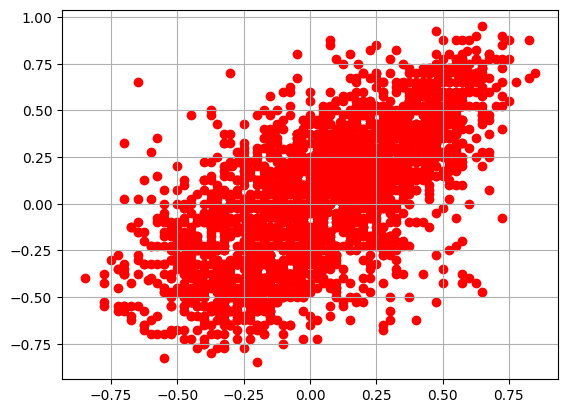

In [12]:
plt.scatter(df_true_copy["valence_true"], df_true_copy["arousal_true"], c="red")
plt.grid(True)
plt.show()

### Add colour map

Segment the songs into their respective quadrants based on the true valence and arousal annotations

In [13]:
def segment_quadrant(s):
    if (s["valence_true"] >= 0) and (s["arousal_true"] >= 0):
        return 1
    elif (s["valence_true"] < 0) and (s["arousal_true"] >= 0):
        return 2
    elif (s["valence_true"] < 0) and (s["arousal_true"] < 0):
        return 3
    elif (s["valence_true"] >= 0) and (s["arousal_true"] < 0):
        return 4

df_true_copy['class'] = df_true_copy.apply(segment_quadrant, axis=1)

display(df_true_copy)

,valence_true,arousal_true,class
0,-0.475,-0.500,3
1,-0.375,-0.425,3
2,0.175,0.125,1
3,-0.150,0.075,2
4,0.200,0.350,1
...,...,...,...
2506,0.525,0.725,1
2507,0.125,0.750,1
2508,0.325,0.425,1
2509,0.550,0.750,1


Text(0.5, 1.0, 'Scatter Plot of True Valence vs. True Arousal')

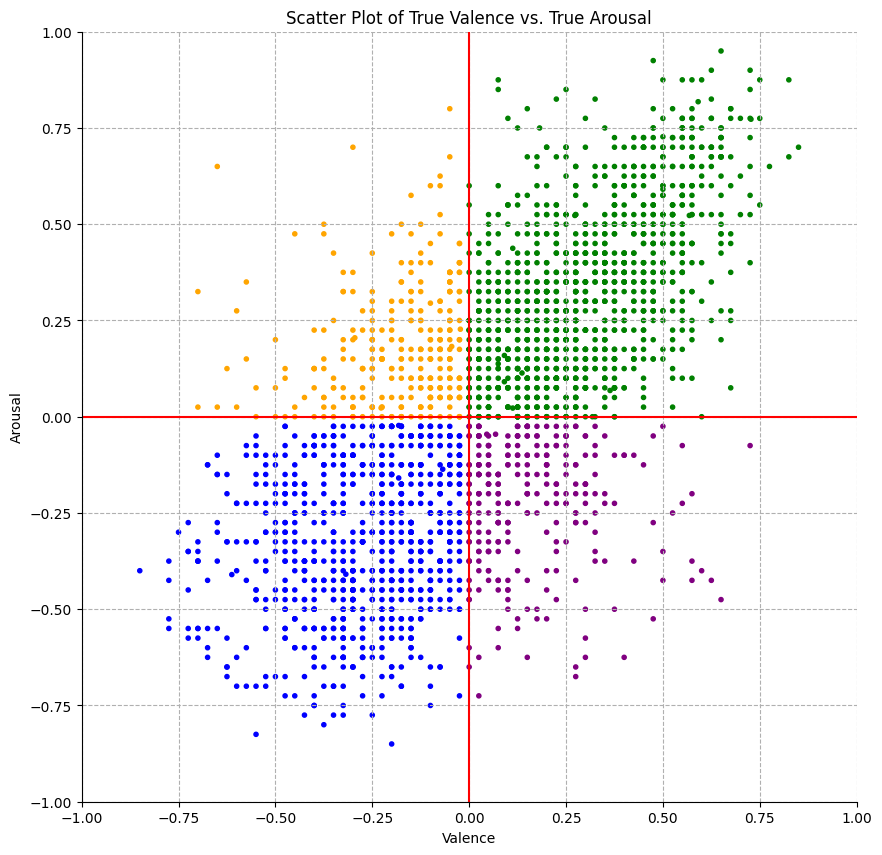

In [18]:
colors_map = {1: "green", 2: "orange", 3: "blue", 4:"purple"}
plt.figure(figsize=(10,10))

plt.scatter(df_true_copy["valence_true"], \
            df_true_copy["arousal_true"], \
            color=[colors_map[name] for name in df_true_copy['class']],
            marker=".")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_position(("data", -1))
plt.gca().spines["bottom"].set_position(("data", -1))

plt.gca().set_xlim([-1, 1])
plt.gca().set_ylim([-1, 1])
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.grid(True, linestyle='--')
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title('Scatter Plot of True Valence vs. True Arousal')

## Scatter plot of predicted valence-arousal values of the 2511 songs

Map the classes from the true values to the predicted values

In [16]:
song_class = df_true_copy['class'].tolist()
df_predicted_copy.insert(2, column='class', value=song_class)
df_predicted_copy

,valence_pred,arousal_pred,class
0,-0.073388,-0.127638,3
1,-0.204395,-0.061863,3
2,0.209312,0.206757,1
3,0.066731,-0.215155,2
4,0.076143,0.265091,1
...,...,...,...
2506,0.253164,0.352882,1
2507,0.409169,0.504471,1
2508,0.296542,0.421905,1
2509,0.612219,0.755452,1


Text(0.5, 1.0, 'Scatter Plot of Predicted Valence vs. Predicted Arousal')

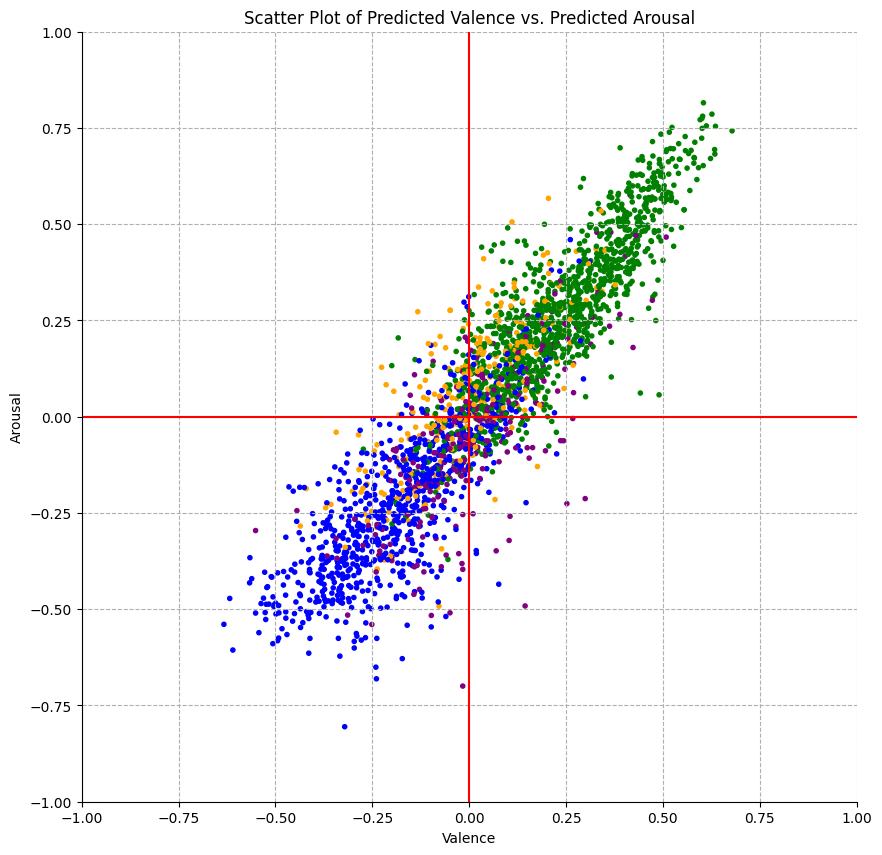

In [20]:
plt.figure(figsize=(10,10))

plt.scatter(df_predicted_copy["valence_pred"], \
            df_predicted_copy["arousal_pred"], \
            color=[colors_map[name] for name in df_predicted_copy['class']],
            marker=".")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_position(("data", -1))
plt.gca().spines["bottom"].set_position(("data", -1))

plt.gca().set_xlim([-1, 1])
plt.gca().set_ylim([-1, 1])
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.grid(True, linestyle='--')
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title('Scatter Plot of Predicted Valence vs. Predicted Arousal')

### Scatter plot of predicted values and true values

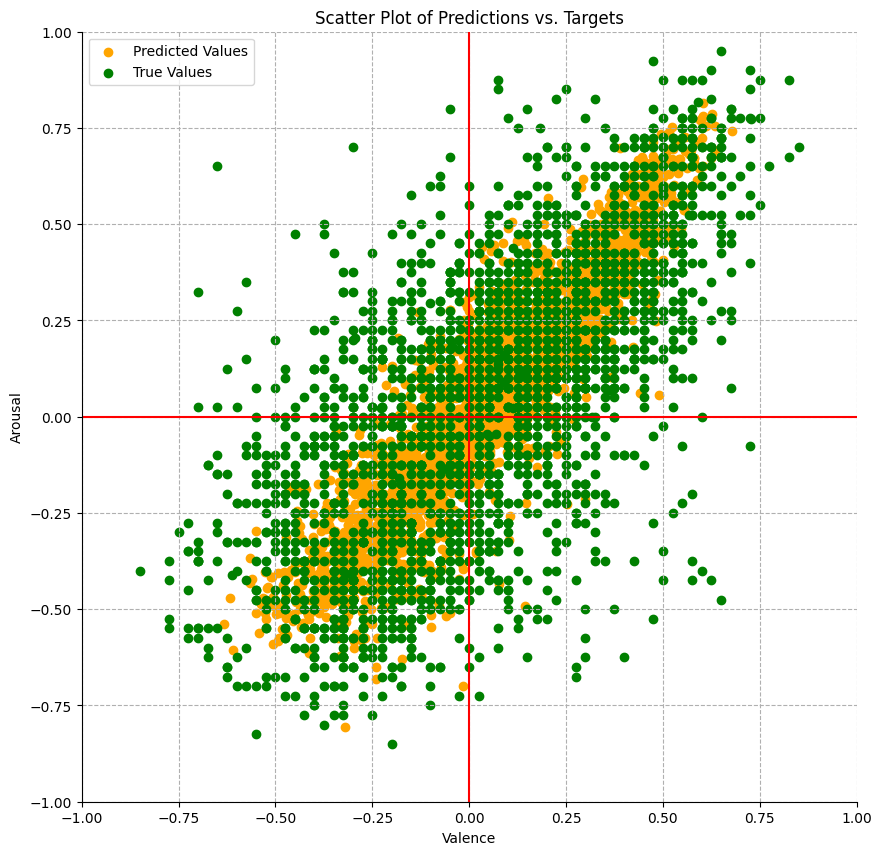

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

# plot the predicted values in orange
for prediction in df_predicted_copy.values:
  predictions_scatter = ax.scatter(prediction[0], prediction[1], color='orange')

# plot the true values in green
for true_value in df_true_copy.values:
  true_values_scatter = ax.scatter(true_value[0], true_value[1], color='green')

# Set the axis labels and title
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_title('Scatter Plot of Predictions vs. Targets')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_position(("data", -1))
plt.gca().spines["bottom"].set_position(("data", -1))

plt.gca().set_xlim([-1, 1])
plt.gca().set_ylim([-1, 1])
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.grid(True, linestyle='--')

# set the legend
legend_elements = [
    predictions_scatter,
    true_values_scatter
]
ax.legend(legend_elements, ['Predicted Values', 'True Values'], loc='upper left')

# Show the plot
plt.show()